In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
df = pd.read_excel("/content/sample_data/Wholesale customers data.xlsx")

In [ ]:
# Check the shape of the dataset
print('Shape of the dataset:', df.shape)

Shape of the dataset: (440, 8)


In [ ]:
# Check the data types of each column
print('Data types of each column:\n', df.dtypes)

Data types of each column:
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [ ]:
# Check the statistical summary of the dataset
print('Statistical summary of the dataset:')
df.describe()

Statistical summary of the dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# Check for missing values in the dataset
print('Missing values in the dataset:\n' )
df.isnull().sum()

Missing values in the dataset:



Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
print(df.columns)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
# Check the shape of the dataset
print('Shape of the dataset:', df.shape)

Shape of the dataset: (440, 8)


So there are no duplicates present in the dataset as the shape is same as before


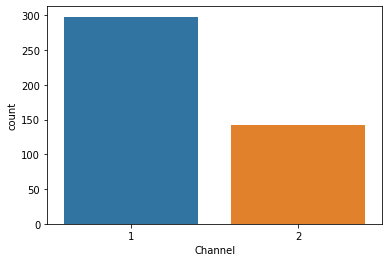

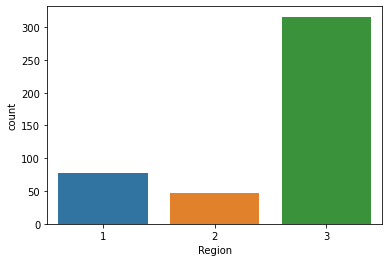

In [ ]:

for col in ['Channel', 'Region']:
  sns.countplot(data=df, x=col)
  plt.show()

The above figures represent that Channel 1 has more number of records than Channel 2 (almost double the records)

Region 3 has the most number of records. 


In [ ]:
num_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [ ]:
# Initialize the scaler
minmax_scaler = MinMaxScaler()

# Scale the numerical columns using MinMaxScaler
df_minmax = df.copy()
df_minmax[num_cols] = minmax_scaler.fit_transform(df[num_cols])

df_minmax

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,2,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...,...,...
435,1,3,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,1,3,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,2,3,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,1,3,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


In [ ]:
# Initialize the scaler
std_scaler = StandardScaler()

# Scale the numerical columns using StandardScaler
df_std = df.copy()
df_std[num_cols] = std_scaler.fit_transform(df[num_cols])
df_std

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,1,3,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,1,3,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,2,3,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,1,3,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [ ]:
# Function to plot the histograms/KDE
sns.set(style='white', palette='muted', color_codes=True)
def plot_graph(scaler_name):
  data =  df_minmax if scaler_name =='MinMaxScaler' else df_std
  for col in num_cols:
      fig, ax = plt.subplots(figsize=(8,2))
      sns.histplot(data[col], kde=True, color='b', ax=ax, label=scaler_name)
      ax.set_title(col)
      ax.legend()

  plt.show()

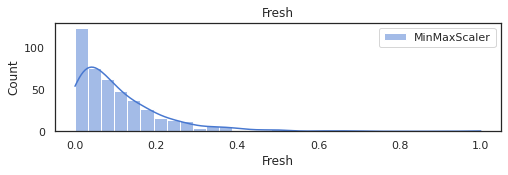

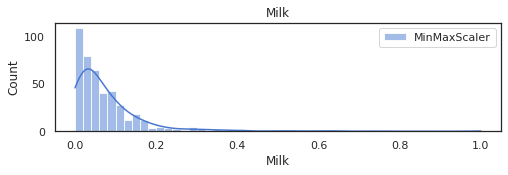

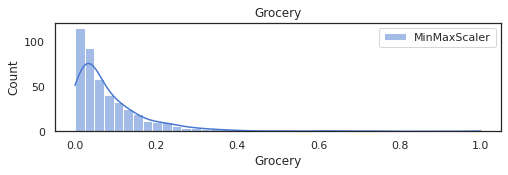

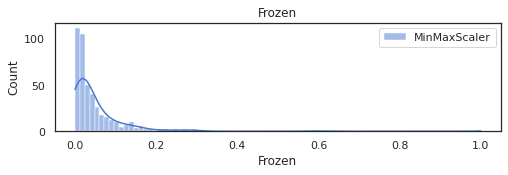

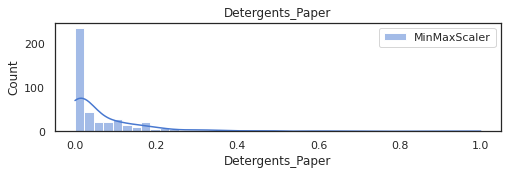

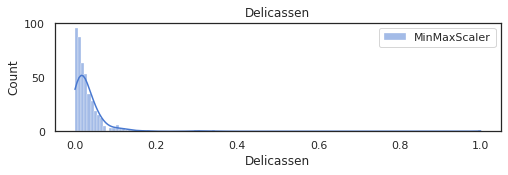

In [ ]:
plot_graph(scaler_name='MinMaxScaler')

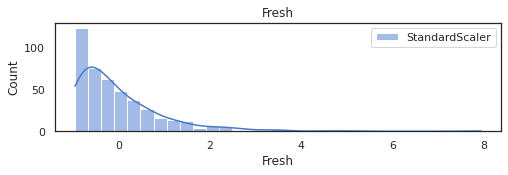

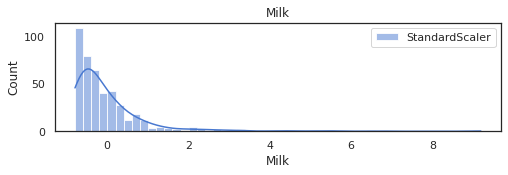

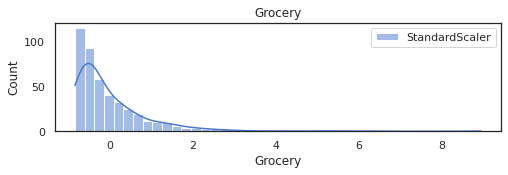

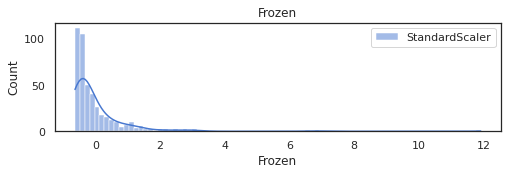

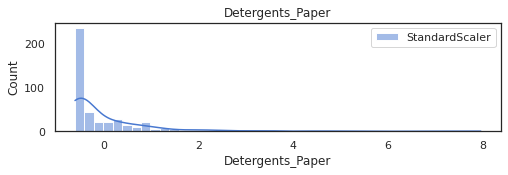

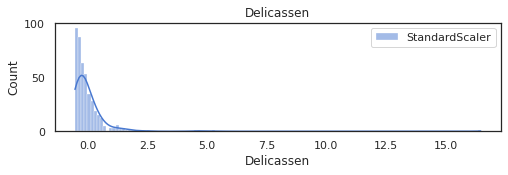

In [ ]:
plot_graph(scaler_name='StandardScaler')

The MinMaxScaler scales the data to a range between 0 and 1, which can be useful when dealing with data that has very different ranges across features. On the other hand, the StandardScaler scales the data to have a mean of 0 and standard deviation of 1, which is more suitable for normally distributed data.

Since the wholesale distributor dataset is not normally distributed and has features with varying ranges, the MinMaxScaler would be a better choice.

   Num of Features  Cross-Validation Score
0                1                0.886364
1                2                0.897727
2                3                0.913636
3                4                0.915909
4                5                0.918182
5                6                0.918182
6                7                0.911364


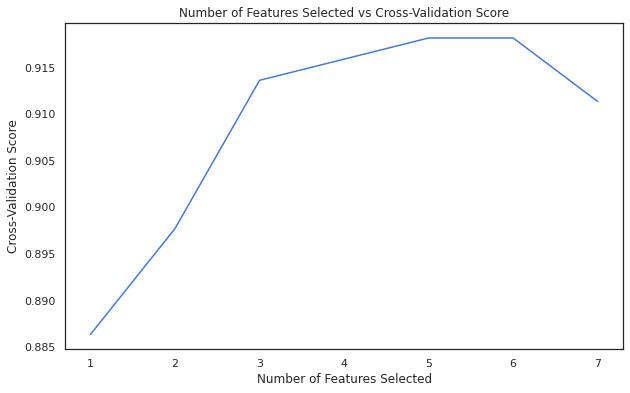

In [4]:

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Separate the features and target variables
X = df.drop('Channel', axis=1)
y = df['Channel']

# Initialize the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the RFECV object
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy')

# Fit the RFECV object to the data
rfecv.fit(X, y)


# Plot the number of features selected versus the cross-validation score using Seaborn
sns.set(style='white', palette='muted', color_codes=True)
plotdata = pd.DataFrame({'Num of Features':range(1, len(rfecv.cv_results_['mean_test_score'])+1),'Cross-Validation Score':rfecv.cv_results_['mean_test_score']})
print(plotdata)
plt.figure(figsize=(10,6))
sns.lineplot(data=plotdata, x='Num of Features', y='Cross-Validation Score')
plt.title('Number of Features Selected vs Cross-Validation Score')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score')
plt.show()


Explanation:

Cross-validation is a technique used to evaluate the performance of machine learning models. It involves dividing the available data into multiple subsets, using some of them for training the model and the remaining ones for testing the model's performance. The cross-validation score represents the average performance of the model over all the different subsets of the data.

In the given statistics, the cross-validation score is reported for different numbers of features used in the machine learning model. The number of features is an important hyperparameter that affects the model's performance. By increasing the number of features, we can capture more information from the data, but we may also introduce noise and overfitting.

As shown in the table, the cross-validation score increases with the number of features up to a certain point and then starts to plateau. The highest cross-validation score of 0.918182 is obtained for both 5 and 6 features, which suggests that using these numbers of features may be the best choice for this particular dataset and machine learning model.

Reasoning:

The given statistics demonstrate the effect of the number of features on the performance of a machine learning model. By increasing the number of features, we can capture more information from the data and potentially improve the model's performance. However, at some point, adding more features may not help or even hurt the performance of the model due to overfitting or noise.

The results in the table show that the cross-validation score increases steadily with the number of features up to a certain point and then levels off. This indicates that there is an optimal number of features that can be used to achieve the best performance for this particular dataset and machine learning model.

In this case, the best cross-validation score of 0.918182 is obtained for 5 and 6 features. This suggests that using either 5 or 6 features can provide the best balance between capturing enough information from the data and avoiding overfitting or noise.

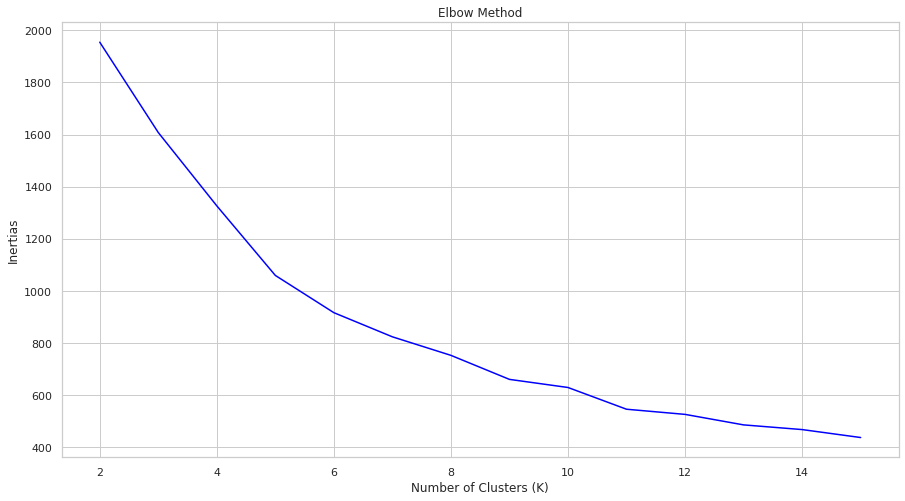

In [ ]:
X = df.drop(['Channel', 'Region'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize empty lists to store within-cluster sum of squares (wcss) and the number of clusters
Inertias = []
num_clusters = []

# Iterate through K=2 to K=15 and compute Inertias for each value of k
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    Inertias.append(kmeans.inertia_)
    num_clusters.append(k)

# Plot the elbow curve
sns.set(style='whitegrid')
plt.figure(figsize=(15, 8))
sns.lineplot(x=num_clusters, y=Inertias, color='blue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertias')
plt.title('Elbow Method')
plt.show()

This code loads the wholesale customers dataset, drops the non-numeric columns, and then iterates through K=2 to K=15 to compute the within-cluster sum of squares (WCSS) for each value of k. The WCSS measures the sum of squared distances between each data point and its assigned centroid in a cluster. The code then plots the elbow curve to identify the optimum number of clusters.

The elbow curve is a plot of the WCSS against the number of clusters. The "elbow" in the curve is the point of inflection where adding more clusters does not significantly reduce the WCSS. This point represents the optimum number of clusters. In this case, we can visually inspect the plot to determine the optimal number of clusters. It appears that the elbow occurs at around k=5 or k=6, so we might choose one of those values for the number of clusters in our KMeans model.


Explained variance ratio for the first 2 components: 0.72459292407745
Explained variance ratio for the first 4 components: 0.9418920905750295


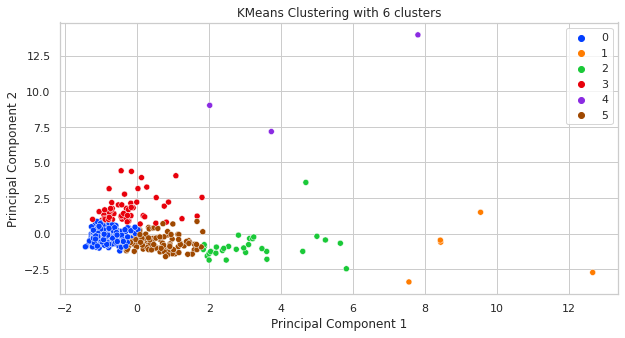

In [12]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Drop non-numeric columns
data = df.drop(['Channel', 'Region'], axis=1) 

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Initialize PCA with n_components=4
pca = PCA(n_components=4)
pca.fit(data_scaled)

# Transform the data using the first two principal components
data_pca_2 = pca.transform(data_scaled)[:, :2]

# Transform the data using the first four principal components
data_pca_4 = pca.transform(data_scaled)[:, :4]

# Print the explained variance ratios for the first two and first four components
print(f"Explained variance ratio for the first 2 components: {sum(pca.explained_variance_ratio_[:2])}")
print(f"Explained variance ratio for the first 4 components: {sum(pca.explained_variance_ratio_[:4])}")

# Perform KMeans clustering on the data transformed by the first two principal components
kmeans_2 = KMeans(n_clusters=6, random_state=42)
kmeans_2.fit(data_pca_2)
labels_2 = kmeans_2.labels_

# Visualize the clusters for the first two principal components
sns.set(style='whitegrid')
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_pca_2[:, 0], y=data_pca_2[:, 1], hue=labels_2, palette='bright')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with 6 clusters')
plt.show()

Observation:

The given statistics represent the explained variance ratio for the first 2 and first 4 components of a principal component analysis (PCA) performed on a dataset. The explained variance ratio for the first 2 components is 0.72459292407745, and the explained variance ratio for the first 4 components is 0.9418920905750295.

Explanation:

PCA is a technique used for dimensionality reduction, which involves transforming a high-dimensional dataset into a lower-dimensional space while retaining most of the variance in the original data. The explained variance ratio represents the proportion of the total variance in the data that is explained by each principal component.

In the given statistics, the explained variance ratio for the first 2 components is 0.72459292407745. This means that the first 2 principal components account for 72.46% of the total variance in the data. The remaining variance is explained by the other principal components.

Similarly, the explained variance ratio for the first 4 components is 0.9418920905750295, indicating that the first 4 principal components account for 94.19% of the total variance in the data. This means that by retaining only the first 4 principal components, we can explain almost all of the variance in the original data.

Reasoning:

The explained variance ratio is a useful metric in PCA, as it helps us understand how much of the original data's variability is captured by each principal component. In the given statistics, we can see that the first 2 components capture a significant amount of the variability in the data, with an explained variance ratio of 0.72459292407745. This indicates that these two components can be used to represent the data in a lower-dimensional space, while retaining most of the information present in the original dataset.

However, in some cases, it may be necessary to retain even more of the original data's variability. In such cases, we can increase the number of principal components retained. As shown in the given statistics, by retaining the first 4 principal components, we can explain almost all of the variance in the original data, with an explained variance ratio of 0.9418920905750295.

Overall, the explained variance ratio can help us determine how many principal components to retain in order to achieve the desired level of variance explanation and dimensionality reduction.

Explained variance ratio for the first 2 components: 0.7835533021025842
Explained variance ratio for the first 4 components: 0.9521944596264821


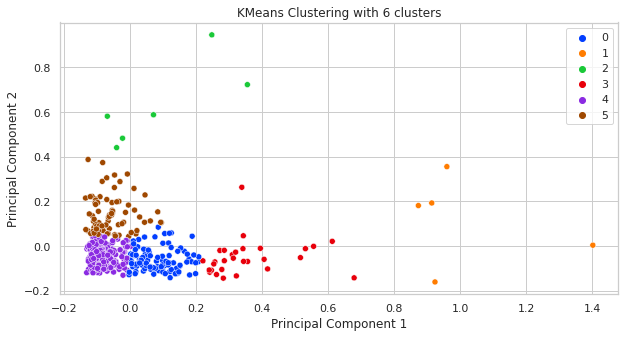

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Drop non-numeric columns
data = df.drop(['Channel', 'Region'], axis=1) 

# Standardize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Initialize PCA with n_components=4
pca = PCA(n_components=4)
pca.fit(data_scaled)

# Transform the data using the first two principal components
data_pca_2 = pca.transform(data_scaled)[:, :2]

# Transform the data using the first four principal components
data_pca_4 = pca.transform(data_scaled)[:, :4]

# Print the explained variance ratios for the first two and first four components
print(f"Explained variance ratio for the first 2 components: {sum(pca.explained_variance_ratio_[:2])}")
print(f"Explained variance ratio for the first 4 components: {sum(pca.explained_variance_ratio_[:4])}")

# Perform KMeans clustering on the data transformed by the first two principal components
kmeans_2 = KMeans(n_clusters=6, random_state=42)
kmeans_2.fit(data_pca_2)
labels_2 = kmeans_2.labels_

# Visualize the clusters for the first two principal components
sns.set(style='whitegrid')
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_pca_2[:, 0], y=data_pca_2[:, 1], hue=labels_2, palette='bright')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with 6 clusters')
plt.show()

using MinMaxScaler gives better explained variance ratio.  
note: the difference is very minimal.

In [3]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

transform_map = {1: 0, 2: 1}

# Split the data into features and target variable
X = df.drop(['Channel', 'Region'], axis=1)
y = df['Channel'].map(transform_map)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the cross-validation method
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(xgb_clf, X_train, y_train, cv=kfold)

# Print the cross-validation results
print('Cross-validation results:', cv_results)
print('Mean accuracy:', cv_results.mean())

# Train the XGBoost classifier on the full training set
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)

# Print the performance metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))


Cross-validation results: [0.91549296 0.92957746 0.9        0.85714286 0.92857143]
Mean accuracy: 0.9061569416498994
Accuracy: 0.9204545454545454
Confusion matrix:
 [[60  5]
 [ 2 21]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        65
           1       0.81      0.91      0.86        23

    accuracy                           0.92        88
   macro avg       0.89      0.92      0.90        88
weighted avg       0.93      0.92      0.92        88



Observation:

The XGBoost classifier has achieved an accuracy of 0.92 on the test set. The confusion matrix shows that out of 65 instances of class 0, the model predicted 60 correctly, and out of 23 instances of class 1, the model predicted 21 correctly. This means that the model is performing well in terms of correctly predicting instances of both classes.

The precision and recall scores in the classification report show that the model has a precision of 0.97 for class 0, meaning that when the model predicts an instance as belonging to class 0, it is correct 97% of the time. The recall score of 0.92 for class 0 indicates that the model correctly identifies 92% of the instances belonging to class 0. Similarly, the model has a precision of 0.81 and recall of 0.91 for class 1, which means that the model correctly predicts 81% of the instances belonging to class 1 and correctly identifies 91% of the instances that actually belong to class 1.

Reasoning:

The XGBoost classifier has performed well on the given dataset, achieving an accuracy of 0.92. The confusion matrix and classification report show that the model has correctly predicted instances of both classes with high precision and recall scores. The high precision scores indicate that the model does not make many false positive predictions, while the high recall scores show that the model correctly identifies most of the instances belonging to each class.

Overall, the XGBoost classifier seems to have learned the underlying patterns in the data well and is making accurate predictions on the test set